<a href="https://colab.research.google.com/github/ryanfernald/San-Jose-Employment-Analysis/blob/main/Job_Title_Total_Cash_Compensation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

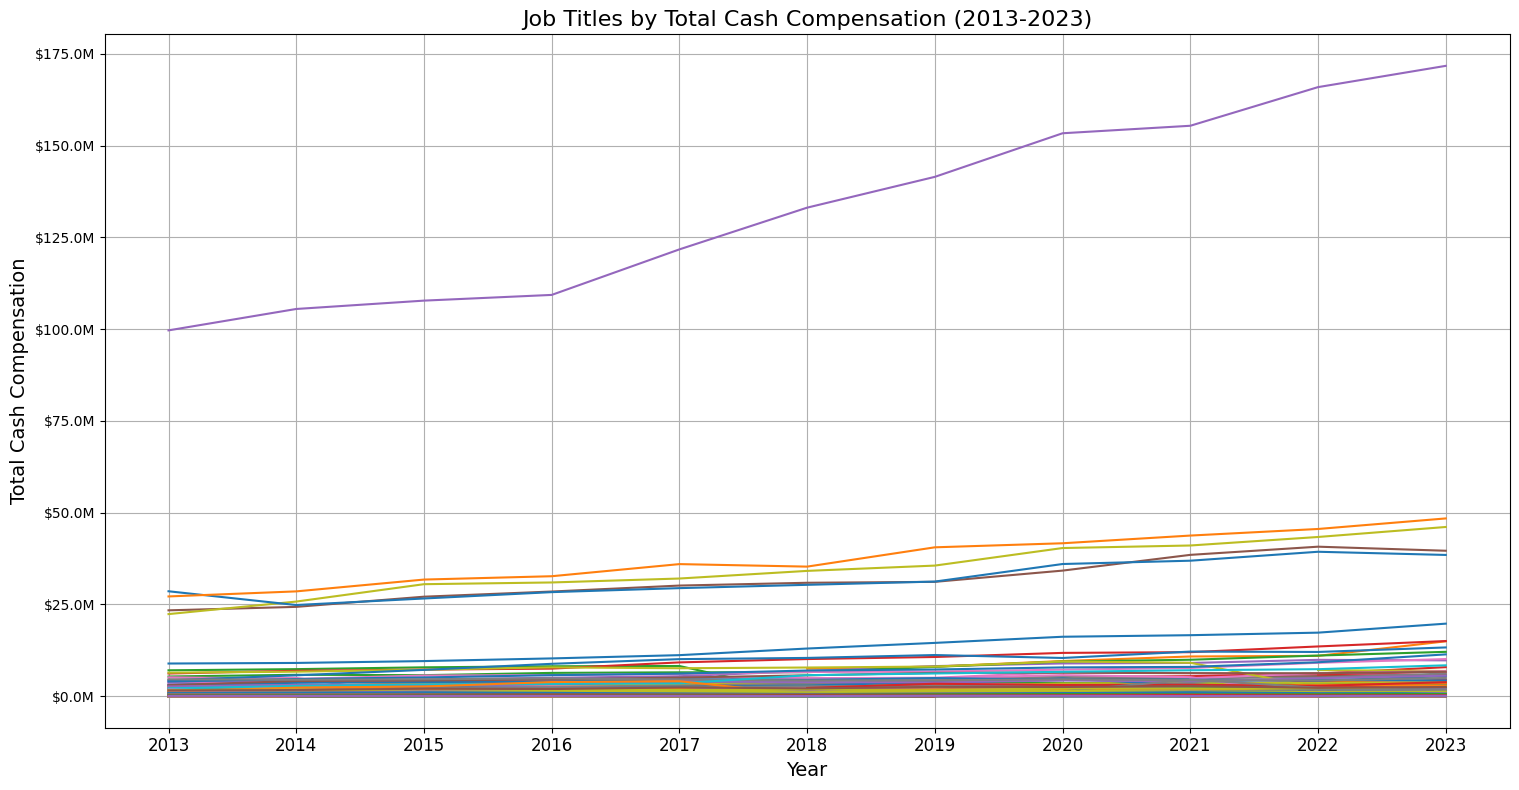

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Import data
file_path = 'sample_data/df_all_years_clean.csv'
df = pd.read_csv(file_path)

# Group by job title and year, then sum the total cash compensation
df_grouped = df.groupby(['Job Title', 'Year'], as_index=False)['Total Cash Compensation'].sum()
df_pivot = df_grouped.pivot(index='Year', columns='Job Title', values='Total Cash Compensation')

# Format the y-axis as millions
def millions_formatter(x, pos):
    return f"${x * 1e-6:.1f}M"

# Plot the data
plt.figure(figsize=(15, 8))
for job_title in df_pivot:
    plt.plot(df_pivot.index, df_pivot[job_title], label=job_title)

# Customize the chart, I did not add legent to this chart because there are too many job title
# The reason to use the line chart is see the overall trend of the job titles
plt.xticks(range(2013, 2024), fontsize=12)
plt.title('Job Titles by Total Cash Compensation (2013-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Cash Compensation', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()


At the bottom of the chart, it might be tough to see the trend over the year, so it might be a great way to indicate how to see the trend over the year => so it might be a great way to demonstrate how many jobs witnessed increase, decrease or stayed consistent over time






In [23]:
import numpy as np

# Calculate the trend for each job title
trend_results = {}
for job_title in df_pivot.columns:
    values = df_pivot[job_title].dropna()
    if len(values) > 1:
        trend = np.polyfit(values.index, values, 1)[0]  # Calculate slope of linear fit
        if trend > 0:
            trend_results[job_title] = 'Increasing'
        elif trend < 0:
            trend_results[job_title] = 'Decreasing'
        else:
            trend_results[job_title] = 'Stable'


# Count trends
trend_counts = {
    'Increasing': sum(1 for trend in trend_results.values() if trend == 'Increasing'),
    'Decreasing': sum(1 for trend in trend_results.values() if trend == 'Decreasing'),
    'Stable': sum(1 for trend in trend_results.values() if trend == 'Stable')
}

print(f"Job Title Trends based on the Total Cash Compensation:\nIncreasing: {trend_counts['Increasing']}\nDecreasing: {trend_counts['Decreasing']}\nStable: {trend_counts['Stable']}")

# If we want to know specifically what job titles decreasing over years
decreasing_jobs = [job_title for job_title, trend in trend_results.items() if trend == 'Decreasing']
if decreasing_jobs:
    print("\nJob Titles with Decreasing Total Cash Compensation:")
    for job in decreasing_jobs:
        print(f"- {job}")
else:
    print("\nNo job titles with decreasing trends.")

# If we want to know specifically what job titles increasing over years
increasing_jobs = [job_title for job_title, trend in trend_results.items() if trend == 'Increasing']
if increasing_jobs:
    print("\nJob Titles with Increasing Total Cash Compensation:")
    for job in increasing_jobs:
        print(f"- {job}")
else:
    print("\nNo job titles with increasing trends.")

Job Title Trends based on the Total Cash Compensation:
Increasing: 492
Decreasing: 174
Stable: 0

Job Titles with Decreasing Total Cash Compensation:
- Account Clerk II
- Administrative Assist C
- Airport Maint Supvr
- Airport Oper Supvr I
- Amusement Park Supvr
- Analyst I C
- Analyst I C PT
- Analyst II C
- Analyst II C PT
- Analyst II PT
- Animal Care Attendant
- Animal Care Attendant PT
- Animal Health Technician
- Aquatic Toxicologist
- Assist Communications Manager
- Assist Indep Police Auditor U
- Assoc Engineer - NE
- Assoc Engineering Tech
- Athletic Stadium Grndskpr
- Background Investigator PT
- Biologist
- Bldg Inspect Combo  FT
- Bldg Inspect, Supvr Cert I
- Building Inspect/Comb Cert FT
- Building Inspect/Comb FT
- Building Inspector, Supvr Cert
- Building Rehab Insp II
- Buyer II
- Chemist
- Chief Of Police U
- Chief of Surveys
- Class Instructor PT
- Communications Technician
- Community Activity Wkr PT
- Community Service Officer I
- Cook FT
- Cook PT
- Council Assista

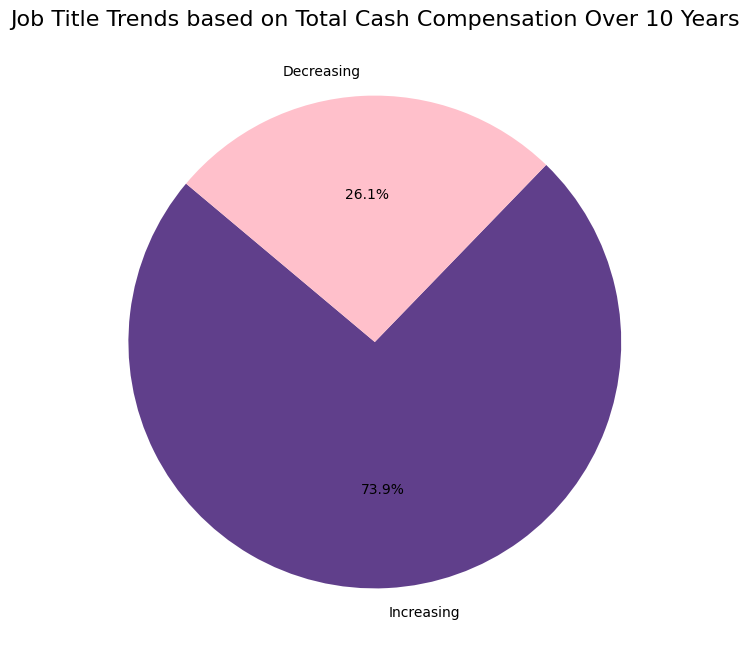

In [ ]:
#Base on the previous calculation, we should eliminate the stable
# Remove "Stable" if its count is 0
if trend_counts['Stable'] == 0:
    trend_counts.pop('Stable')

# Pie chart for trends
plt.figure(figsize=(8, 8))
plt.pie(
    trend_counts.values(),
    labels=trend_counts.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=['#603f8b', '#FFC0CB']
)
plt.title('Job Title Trends based on Total Cash Compensation Over 10 Years', fontsize=16)
plt.show()